# Analysing the Data of the Rocket Launches Between 1957-2020

### Import Statements

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

sns.set_style("ticks")

rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["axes.spines.right"] = False
rcParams["axes.spines.top"] = False
rcParams["axes.titlesize"] = 40
rcParams["axes.titleweight"] = 700
rcParams["font.family"] = "Helvetica"
rcParams["axes.facecolor"] = "white"
rcParams["grid.linestyle"] = "--"
rcParams["grid.color"] = "gray"
rcParams["axes.labelsize"] = 20
rcParams["axes.labelweight"] = 700

%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

### Loading the Data

In [44]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of *df_data*? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [45]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [46]:
df_data.shape

(4324, 9)

In [47]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [48]:
df_data.duplicated().any().sum()

0

In [49]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

## Data Cleaning

In [50]:
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [51]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [52]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

A chart that shows the number of space mission launches by organisation.

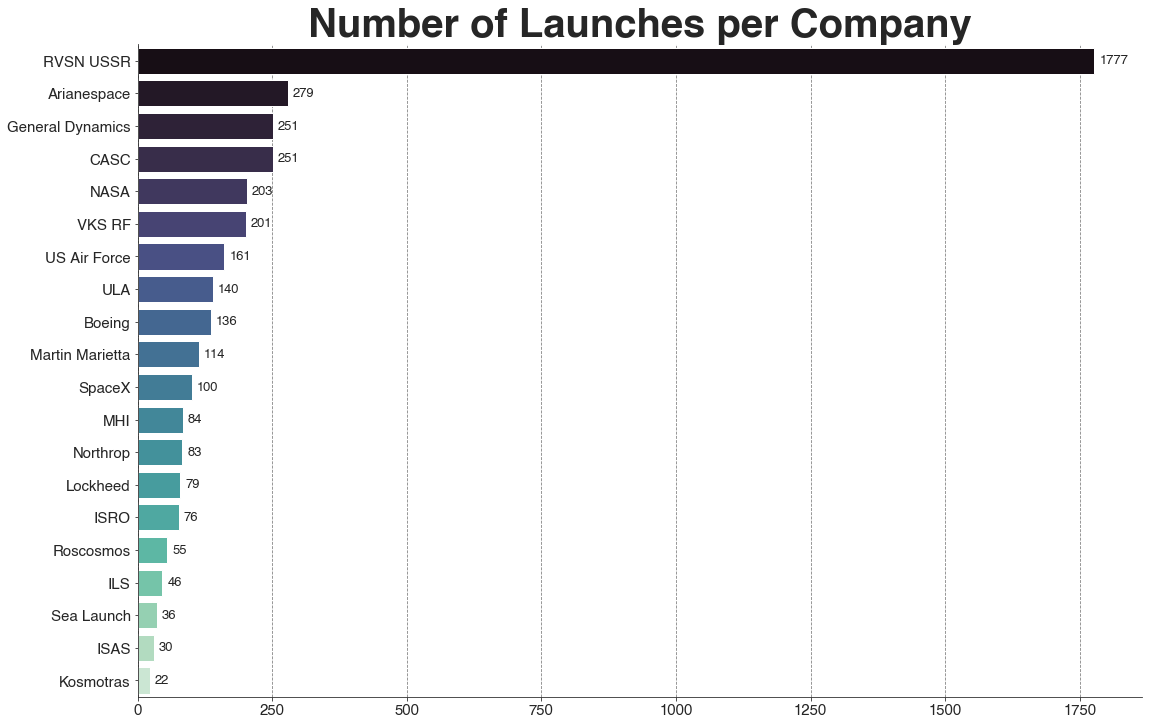

In [53]:
plt.figure(figsize=(18,12))
g = sns.barplot(data=df_data.groupby("Organisation").count().reset_index().sort_values("Location",ascending=False).head(20),\
                y="Organisation", x="Location", palette="mako")
plt.grid(axis="x")
plt.title("Number of Launches per Company")
plt.ylabel("")
plt.xlabel("")
for c in g.containers:
    g.bar_label(c, padding=5, fontsize=13)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [54]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [55]:
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [56]:
df_data["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

A histogram about the prices. The price column is given in USD millions (careful of missing values). 

Text(0.5, 1.0, 'Distribution of the Launch Prices')

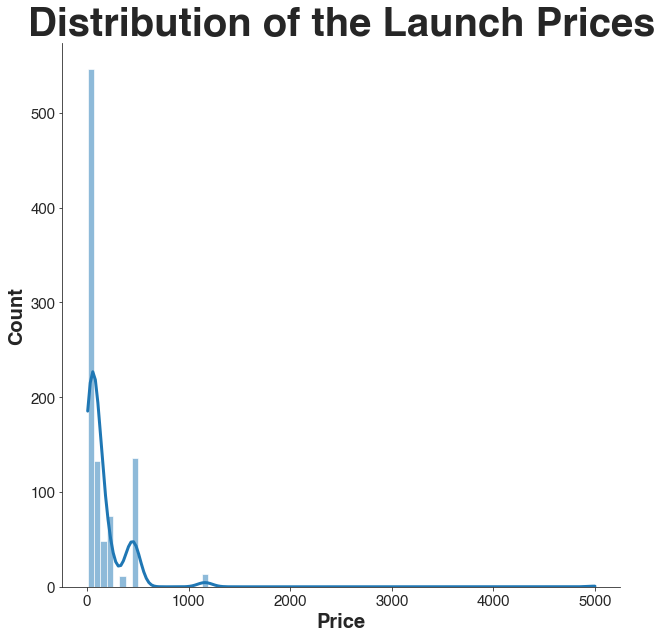

In [57]:
price = df_data.dropna()["Price"].str.replace(",","").astype(float)
plt.figure(figsize=(10,10))
sns.histplot(price, bins=80, kde=True, line_kws={"linewidth":3})
plt.title("Distribution of the Launch Prices")

# The Total Amount of Money Spent by Organisation on Space Missions

In [58]:
spent = df_data.dropna()
spent["Price"] = price
spent = spent.groupby("Organisation").sum()
spent

<ipython-input-58-b64159cd4612>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spent["Price"] = price


,Price
Organisation,
Arianespace,"16,345.00"
Boeing,"1,241.00"
CASC,"6,340.26"
EER,20.00
ESA,37.00
Eurockot,543.40
ExPace,28.30
ILS,"1,320.00"
ISRO,"2,177.00"


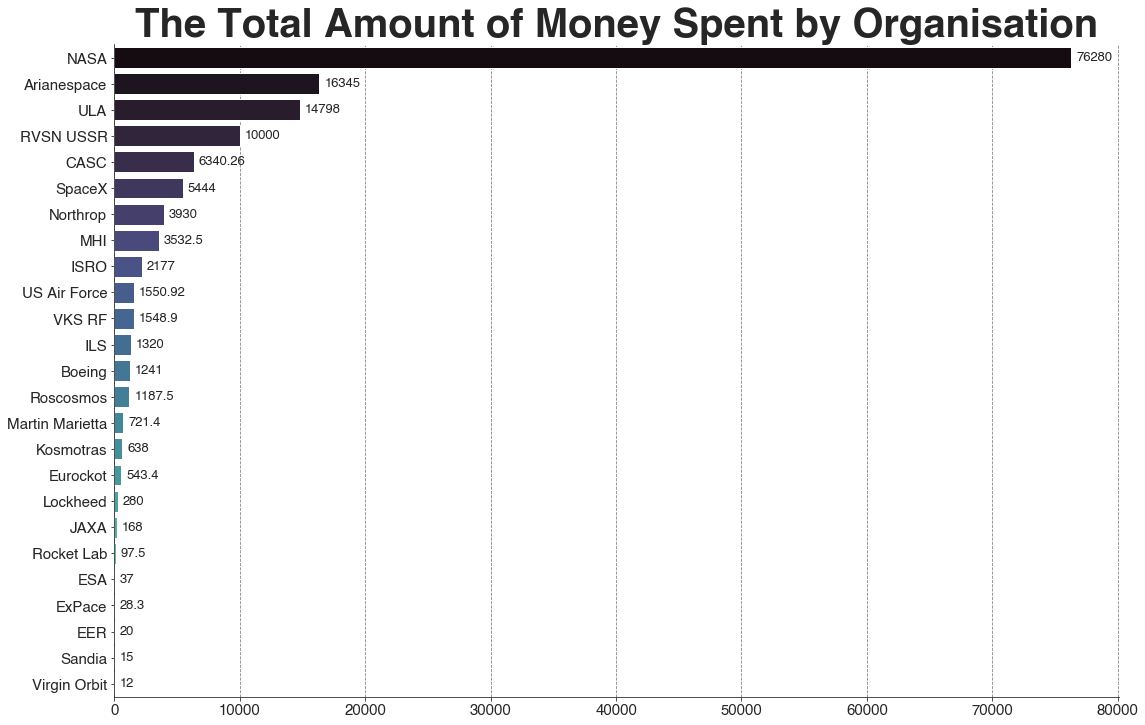

In [59]:
plt.figure(figsize=(18,12))
g = sns.barplot(data=spent.sort_values("Price", ascending=False).reset_index(), x="Price", y="Organisation", palette="mako")
plt.grid(axis="x")
plt.title("The Total Amount of Money Spent by Organisation")
plt.ylabel("")
plt.xlabel("")
for c in g.containers:
    g.bar_label(c, padding=5, fontsize=13)

# The Amount of Money Spent by Organisation per Launch

In [60]:
spent = df_data.copy()
spent["Price"] = price
spent.dropna(inplace=True)
spent2 = spent.groupby("Organisation").count()
spent = (spent.groupby("Organisation").sum() / spent2)
spent

,Date,Detail,Location,Mission_Status,Price,Rocket_Status
Organisation,,,,,,
Arianespace,NaN,NaN,NaN,NaN,170.26,NaN
Boeing,NaN,NaN,NaN,NaN,177.29,NaN
CASC,NaN,NaN,NaN,NaN,40.13,NaN
EER,NaN,NaN,NaN,NaN,20.00,NaN
ESA,NaN,NaN,NaN,NaN,37.00,NaN
Eurockot,NaN,NaN,NaN,NaN,41.80,NaN
ExPace,NaN,NaN,NaN,NaN,28.30,NaN
ILS,NaN,NaN,NaN,NaN,101.54,NaN
ISRO,NaN,NaN,NaN,NaN,32.49,NaN


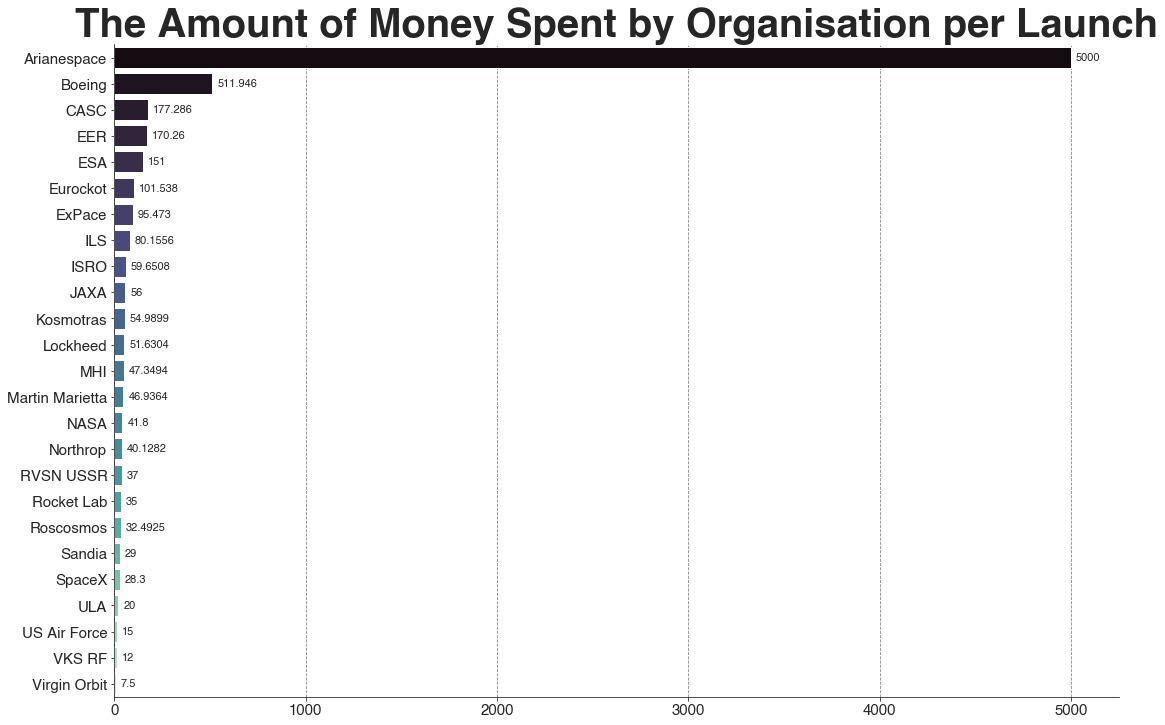

In [61]:
plt.figure(figsize=(18,12))
g = sns.barplot(data=spent.sort_values("Price", ascending=False), x="Price", y=spent.index, palette="mako")
plt.grid(axis="x")
plt.title("The Amount of Money Spent by Organisation per Launch")
plt.ylabel("")
plt.xlabel("")
for c in g.containers:
    g.bar_label(c, padding=5, fontsize=11)

# The Number of Launches per Year

In [62]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


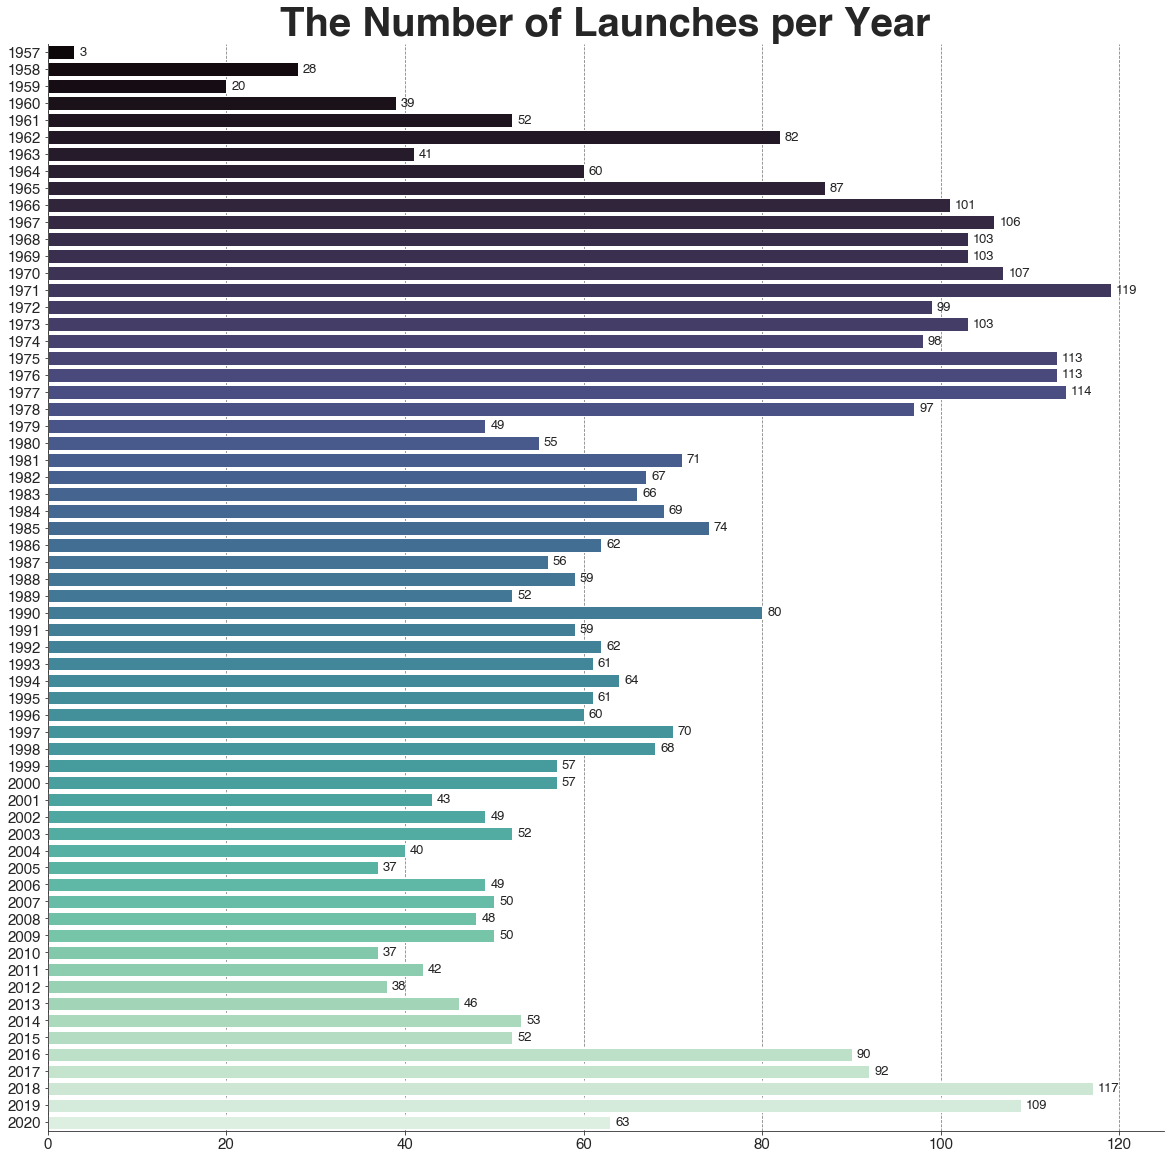

In [63]:
df_data["Year"] = df_data["Date"].str.split().str[3]
by_year = df_data.groupby("Year").count()
by_year = by_year["Organisation"].reset_index()
by_year

plt.figure(figsize=(20,20))
g = sns.barplot(data=by_year, y="Year", x="Organisation", palette="mako")
plt.grid(axis="x")
plt.title("The Number of Launches per Year")
plt.ylabel("")
plt.xlabel("")
for c in g.containers:
    g.bar_label(c, padding=5, fontsize=13)

# The Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time?

In [64]:
df_data["Month"] = df_data["Date"].str.split().str[1]
by_month = df_data.groupby("Month").count().reset_index()

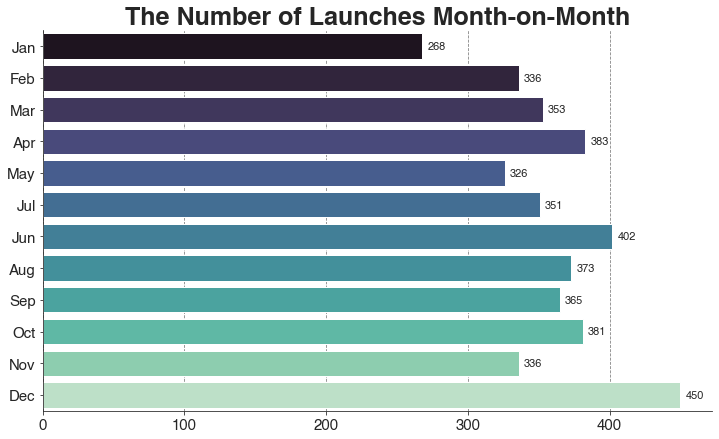

In [65]:
order = "Jan Feb Mar Apr May Jul Jun Aug Sep Oct Nov Dec".split()
by_month["Month"] = pd.CategoricalIndex(by_month["Month"], order, True)

plt.figure(figsize=(12,7))
g = sns.barplot(data=by_month, y="Month", x="Organisation", palette="mako")
plt.grid(axis="x", color="gray",linestyle="--")
plt.title("The Number of Launches Month-on-Month", size=25, fontweight="black")
plt.ylabel("")
plt.xlabel("")

for c in g.containers:
    g.bar_label(c, padding=5, fontsize=11)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [66]:
by_month.sort_values("Date", 0, False).iloc[[0,1,2,-3,-2,-1]]

,Month,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
2,Dec,450,450,450,450,450,92,450,450
6,Jun,402,402,402,402,402,85,402,402
0,Apr,383,383,383,383,383,91,383,383
9,Nov,336,336,336,336,336,77,336,336
8,May,326,326,326,326,326,86,326,326
4,Jan,268,268,268,268,268,66,268,268


# How has the Launch Price varied Over Time? 

A line chart that shows the average price of rocket launches over time. 

Text(0.5, 1.0, 'The Average Price of Rocket Launches Over Time')

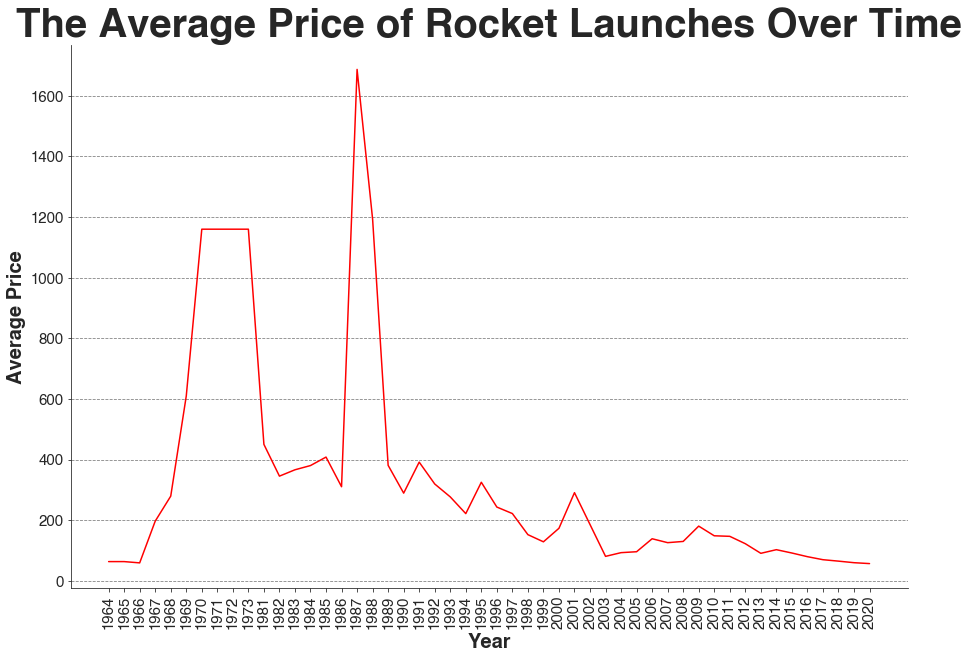

In [67]:
df_data["Price"] = price
by_year = df_data.dropna().groupby("Year").mean().reset_index()

plt.figure(figsize=(15,10))
g = sns.lineplot(data=by_year, x="Year", y="Price", color="red")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("The Average Price of Rocket Launches Over Time")


# The Number of Launches over Time by the Top 10 Organisations

How has the dominance of launches changed over time between the different players? 

In [68]:
total = df_data.groupby("Organisation").count().reset_index().sort_values("Location",ascending=False)
total["Total"] = total["Location"]
total = total[["Organisation","Total"]].set_index("Organisation")
by_organisation = df_data.groupby(["Organisation","Year"]).count()
by_organisation = by_organisation.join(total).reset_index().groupby(["Organisation","Total","Year"]).sum().sort_values("Total",0,False)
by_organisation.head()

Location  Date  Detail  Rocket_Status  Price  \
Organisation Total Year                                                 
RVSN USSR    1777  1987        42    42      42             42      1   
                   1969        82    82      82             82      0   
                   1966        51    51      51             51      0   
                   1965        53    53      53             53      0   
                   1964        36    36      36             36      0   

                         Mission_Status  Month  
Organisation Total Year                         
RVSN USSR    1777  1987              42     42  
                   1969              82     82  
                   1966              51     51  
                   1965              53     53  
                   1964              36     36

In [69]:
orgs = by_organisation.index.get_level_values("Organisation")
first_10 = {}
for org in orgs:
    if len(first_10.keys()) <= 10:
        if org in first_10.keys():
            first_10[org] += 1
        else:
            first_10[org] = 1
total_rows = sum(first_10.values())
print(total_rows)
print(first_10)

324
{'RVSN USSR': 39, 'Arianespace': 37, 'CASC': 47, 'General Dynamics': 37, 'NASA': 46, 'VKS RF': 29, 'US Air Force': 25, 'ULA': 15, 'Boeing': 18, 'Martin Marietta': 30, 'SpaceX': 1}


In [70]:
by_organisation.iloc[320:325]

Location  Date  Detail  Rocket_Status  Price  \
Organisation    Total Year                                                 
Martin Marietta 114   1979         4     4       4              4      0   
                      1985         2     2       2              2      0   
                      1986         1     1       1              1      0   
SpaceX          100   2007         1     1       1              1      1   
                      2014         6     6       6              6      6   

                            Mission_Status  Month  
Organisation    Total Year                         
Martin Marietta 114   1979               4      4  
                      1985               2      2  
                      1986               1      1  
SpaceX          100   2007               1      1  
                      2014               6      6

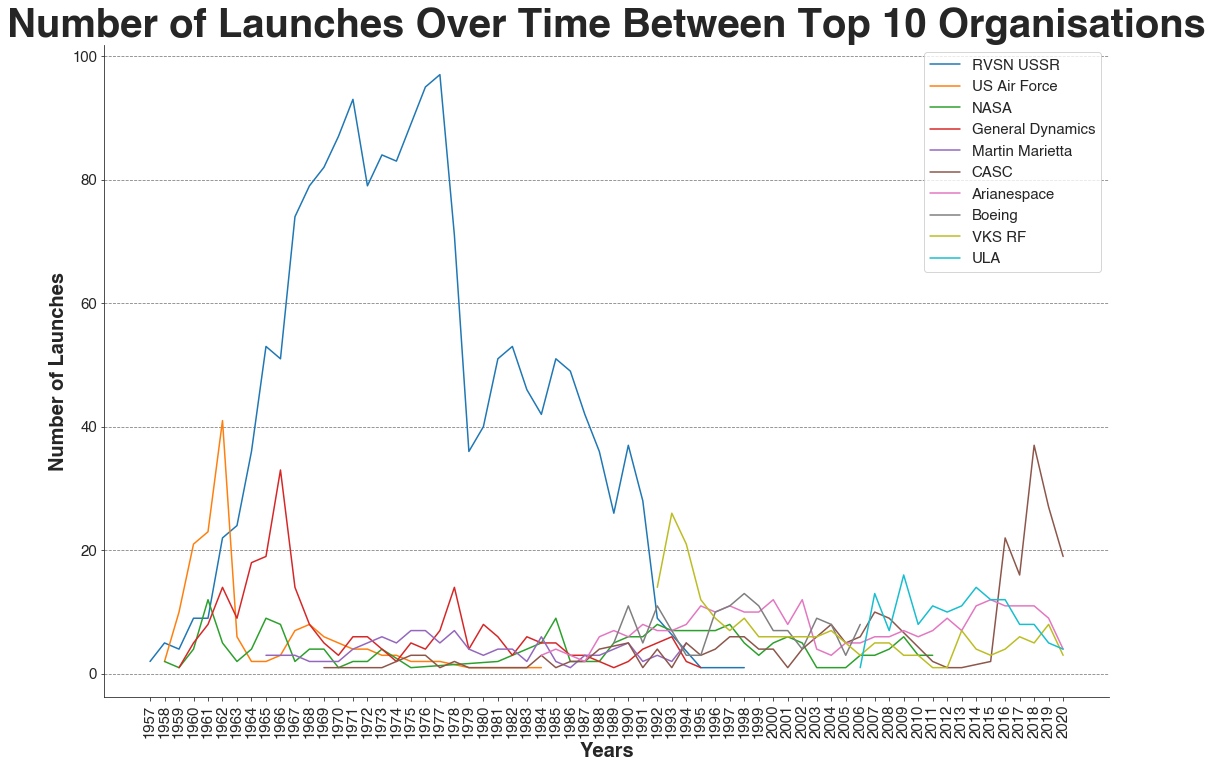

In [71]:
plt.figure(figsize=(18,12))
g = sns.lineplot(data=by_organisation.iloc[:323].sort_values("Year"), x="Year", y="Location", hue="Organisation")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Launches")
plt.title("Number of Launches Over Time Between Top 10 Organisations")
plt.legend(fontsize=15)

## The Total Number of Mission Failures Year on Year

In [83]:
failures = df_data[df_data["Mission_Status"]!="Success"]
failures = failures.groupby("Year").count()
failures

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Month,Country
Year,,,,,,,,,
1957,1,1,1,1,1,0,1,1,1
1958,22,22,22,22,22,0,22,22,22
1959,12,12,12,12,12,0,12,12,12
1960,20,20,20,20,20,0,20,20,20
1961,20,20,20,20,20,0,20,20,20
...,...,...,...,...,...,...,...,...,...
2016,4,4,4,4,4,3,4,4,4
2017,8,8,8,8,8,4,8,8,8
2018,4,4,4,4,4,1,4,4,4


Text(0.5, 1.0, 'Number of Failures Year on Year')

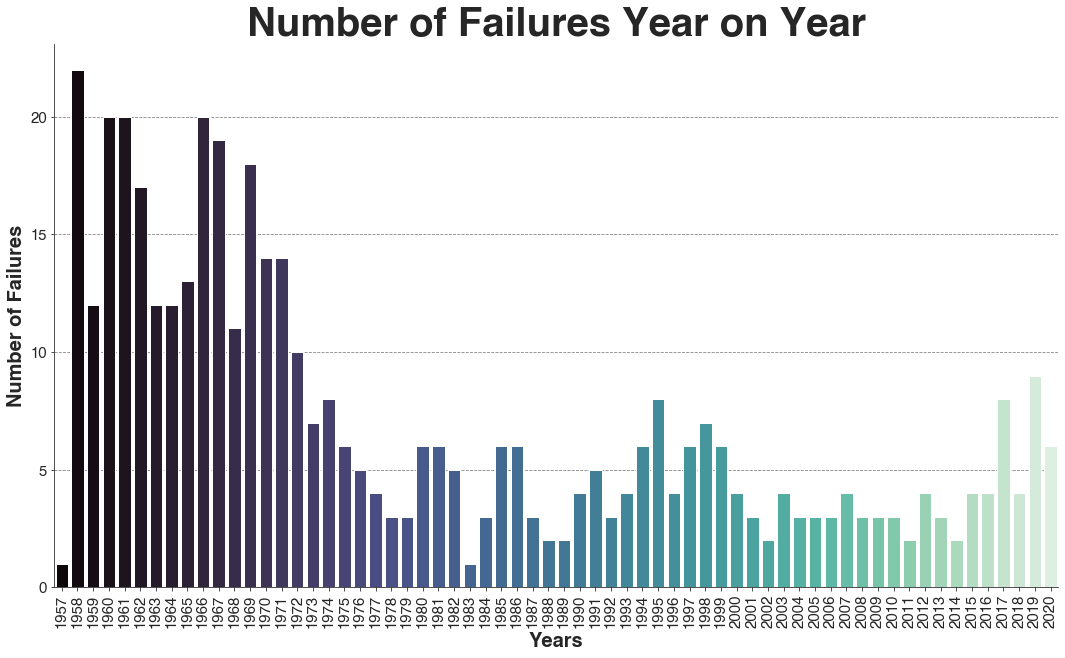

In [84]:
plt.figure(figsize=(18,10))
g = sns.barplot(data=failures.reset_index(), x="Year", y="Date", palette="mako")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Failures")
plt.title("Number of Failures Year on Year")

## The Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [85]:
df_data["Year"] = df_data["Year"].astype(int)
all_status = df_data.groupby("Year").count()
per_fail = failures / all_status * 100

Text(0.5, 1.0, 'The Percentage of Failures over Time')

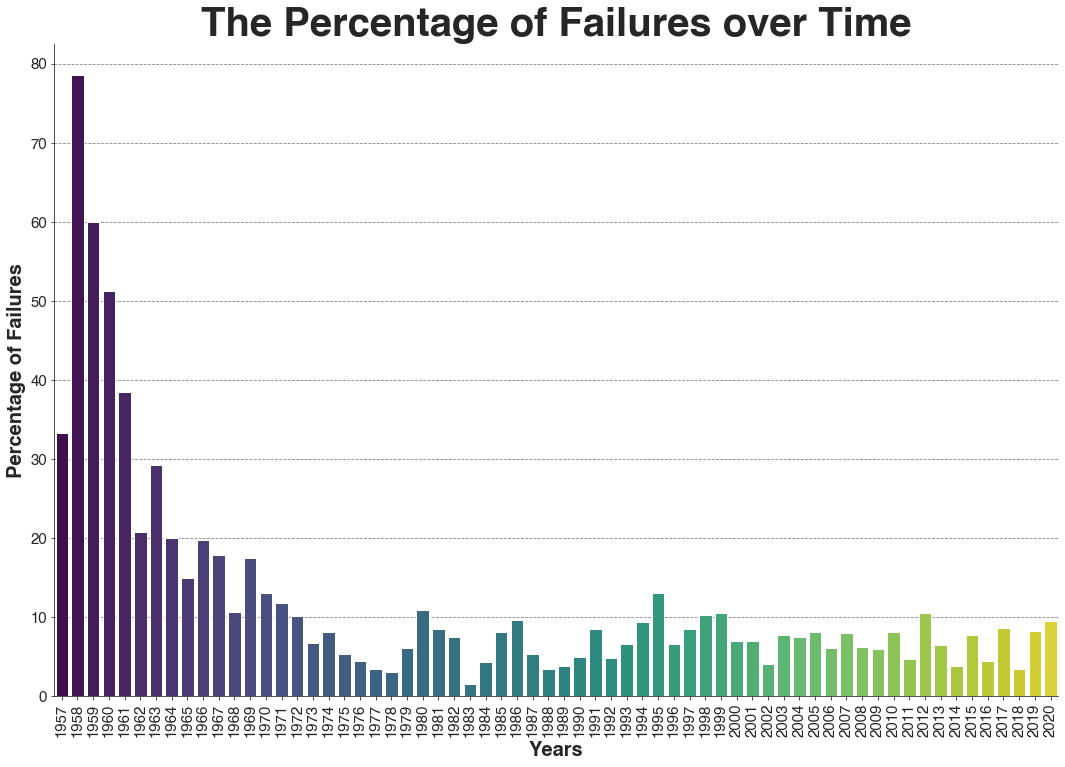

In [86]:
plt.figure(figsize=(18,12))
g = sns.barplot(data=per_fail,x=per_fail.index,y="Organisation", palette="viridis")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Percentage of Failures")
plt.title("The Percentage of Failures over Time")

#  For every year, which Country was in the Lead in terms of Total Number of Launches up to and including 2020?

In [76]:
df_data["Country"] = df_data["Location"].str.split().str[-1]
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,Aug,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,Aug,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,Aug,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Jul,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,Jul,USA


In [77]:
by_country = df_data.groupby(["Country","Year"]).count().reset_index()
by_country

,Country,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Month
0,Australia,1967,1,1,1,1,1,0,1,1
1,Australia,1968,1,1,1,1,1,0,1,1
2,Australia,1969,1,1,1,1,1,0,1,1
3,Australia,1970,2,2,2,2,2,0,2,2
4,Australia,1971,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
430,USA,2020,21,21,21,21,21,20,21,21
431,Zealand,2017,1,1,1,1,1,1,1,1
432,Zealand,2018,3,3,3,3,3,3,3,3
433,Zealand,2019,6,6,6,6,6,6,6,6


In [78]:
country_arr = []
for i in by_country["Year"].unique():
    filtered_by_year = by_country[(by_country["Year"]==i)]
    s = filtered_by_year[filtered_by_year["Date"]==filtered_by_year["Date"].max()][["Year","Country"]]
    country_arr.append(list(s.iloc[0]))
country_arr = pd.DataFrame(country_arr, columns=(["Year","Country"])).sort_values("Year",0,True)
country_arr

,Year,Country
56,1957,Kazakhstan
57,1958,USA
58,1959,USA
59,1960,USA
60,1961,USA
...,...,...
45,2016,USA
46,2017,USA
47,2018,China
48,2019,China


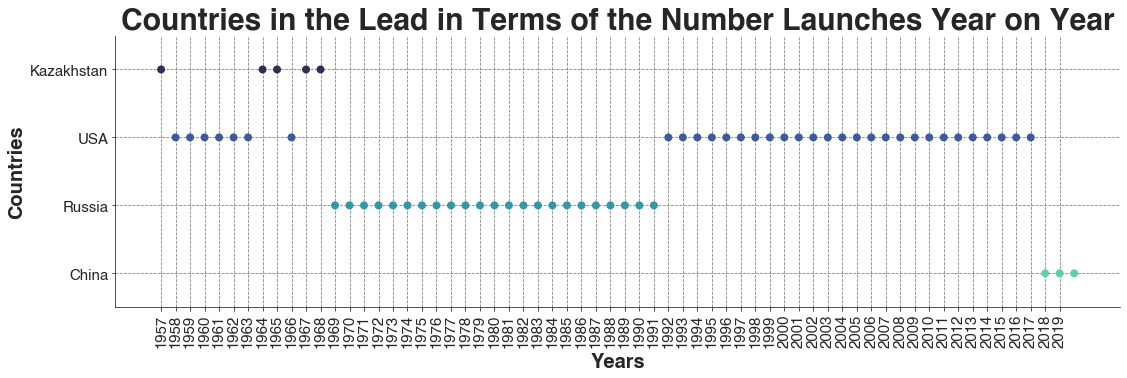

In [79]:
plt.figure(figsize=(18,5))
g = sns.swarmplot(data=country_arr,x="Year",y="Country", palette="mako",size=8)
plt.grid(axis="y")
plt.grid(axis="x")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Countries")
plt.title("Countries in the Lead in Terms of the Number Launches Year on Year", size=30)
plt.xticks(range(1957,2020))
plt.show()

## Do the results change if we only look at the number of successful launches? 
The answer is yes. The order of the countries in the lead doesn't change but there are very little differences.

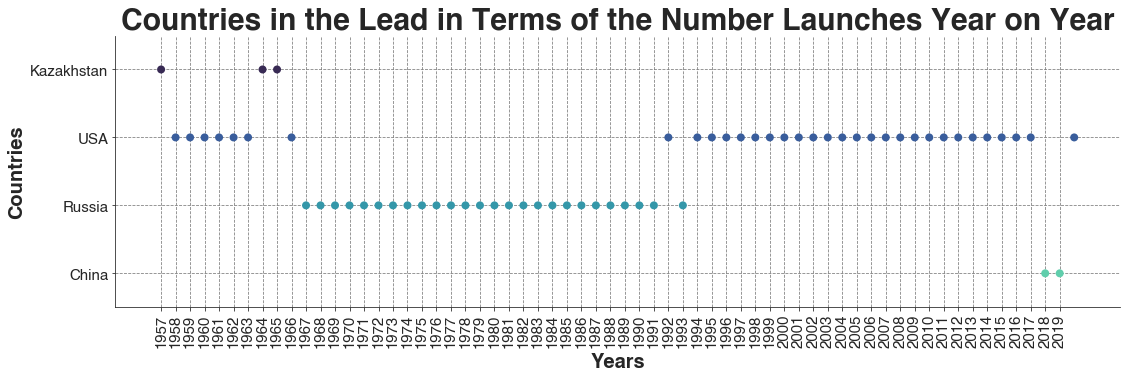

In [80]:
by_country = df_data[df_data["Mission_Status"]=="Success"].groupby(["Country","Year"]).count().reset_index()
country_arr = []
for i in by_country["Year"].unique():
    filtered_by_year = by_country[(by_country["Year"]==i)]
    s = filtered_by_year[filtered_by_year["Date"]==filtered_by_year["Date"].max()][["Year","Country"]]
    country_arr.append(list(s.iloc[0]))
country_arr = pd.DataFrame(country_arr, columns=(["Year","Country"])).sort_values("Year",0,True)
plt.figure(figsize=(18,5))
g = sns.swarmplot(data=country_arr,x="Year",y="Country", palette="mako",size=8)
plt.grid(axis="y")
plt.grid(axis="x")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Countries")
plt.title("Countries in the Lead in Terms of the Number Launches Year on Year", size=30)
plt.xticks(range(1957,2020))
plt.show()

# A Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

Top 10 organisations over time are used for this chart. It's the chart named "Number of Launches Over Time Between Top 10 Organisations", but only 1970s and 1980s are included.

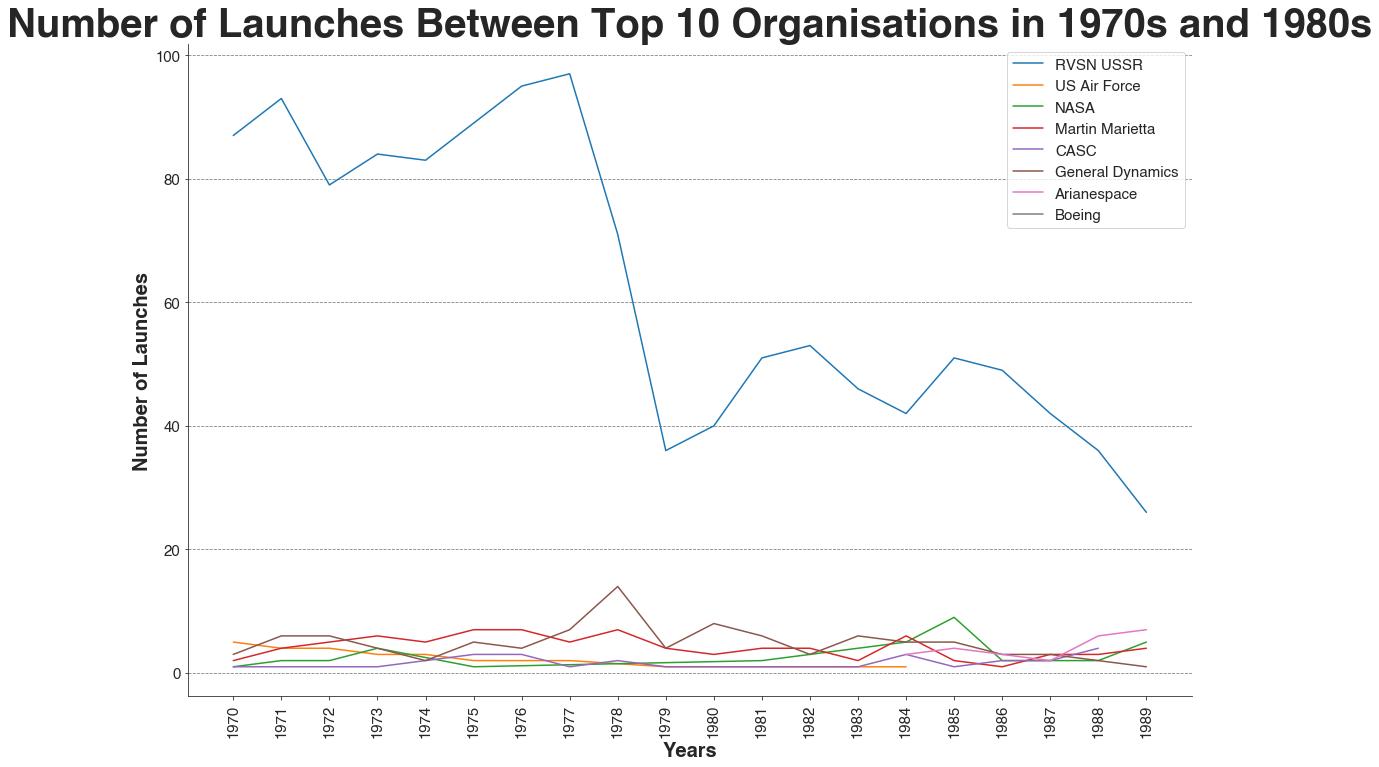

In [81]:
new_org = by_organisation.iloc[:323].reset_index()
new_org["Year"] = new_org["Year"].astype(int)
new_org = new_org[new_org["Year"].isin(range(1970,1990))].sort_values("Year")
new_org["Year"] = new_org["Year"].astype(str)

plt.figure(figsize=(18,12))
g = sns.lineplot(data=new_org, x="Year", y="Location", hue="Organisation")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Launches")
plt.title("Number of Launches Between Top 10 Organisations in 1970s and 1980s")
plt.legend(fontsize=15)

Same as the above but only 2018-2019-2020 included

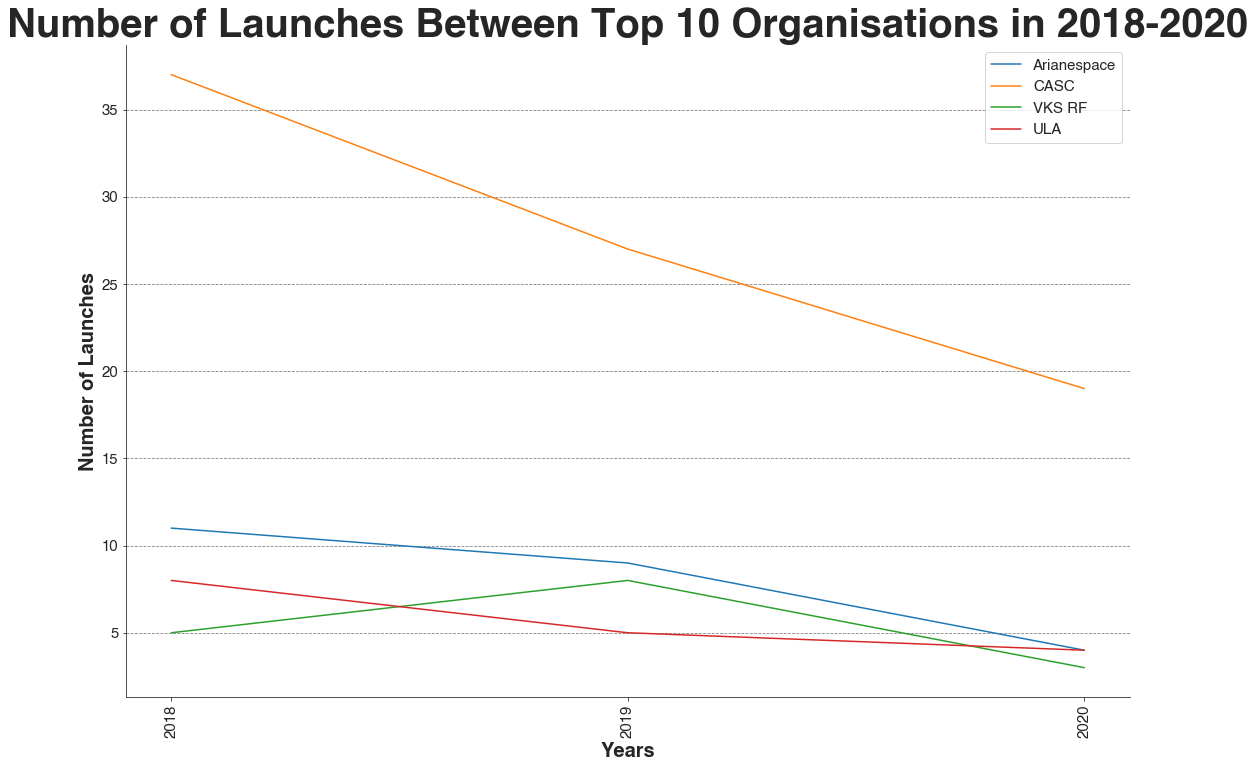

In [82]:
new_org = by_organisation.iloc[:323].reset_index()
new_org["Year"] = new_org["Year"].astype(int)
new_org = new_org[new_org["Year"].isin(range(2018,2021))].sort_values("Year")
new_org["Year"] = new_org["Year"].astype(str)

plt.figure(figsize=(18,12))
g = sns.lineplot(data=new_org, x="Year", y="Location", hue="Organisation")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Launches")
plt.title("Number of Launches Between Top 10 Organisations in 2018-2020")
plt.legend(fontsize=15)